In [1]:
import numpy as np

# Sample past 10 closing prices of BANKNIFTY
closing_prices = [47800, 47950, 48000, 47850, 48100, 47900, 48050, 47875, 47925, 48025]

mean = np.mean(closing_prices)
std_dev = np.std(closing_prices)
msv = mean + std_dev

print(f"MSV: {msv:.2f}")


MSV: 48037.95


In [2]:
atm_ce_premiums = [130, 125, 132, 128, 129, 131, 127, 130, 126, 128]

mean = np.mean(atm_ce_premiums)
std_dev = np.std(atm_ce_premiums)
msv = mean + std_dev

print(f"MSV for ATM CE: {msv:.2f}")


MSV for ATM CE: 130.71


In [1]:
import requests

# Define the prompt to be sent
prompt = 'Please generate a simple blog post according to this title "What is CHATGPT"'

# Enter E-mail to generate API
api_key = 'yogeshwaranaravindan@gmail.com'

# Define the default model if none is specified
default_model = 'gpt-3.5-turbo'

# Uncomment the model you want to use, and comment out the others
# model = 'gpt-4'
# model = 'gpt-4-32k'
# model = 'gpt-3.5-turbo-0125'
model = default_model

# Build the URL to call
api_url = f'http://195.179.229.119/gpt/api.php?prompt={requests.utils.quote(prompt)}&api_key={requests.utils.quote(api_key)}&model={requests.utils.quote(model)}'

try:
    # Execute the HTTP request
    response = requests.get(api_url)
    response.raise_for_status()  # Raise an error for bad HTTP status codes

    # Parse and print the response
    data = response.json()
    print(data)

except requests.RequestException as e:
    # Print any errors
    print(f'Request Error: {e}')

{'error': 'Invalid API key or API key expired.'}


[*********************100%***********************]  1 of 1 completed

Epoch 1/20



C:\Users\yoges\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


34/34 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0731
Epoch 2/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0049
Epoch 3/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0033
Epoch 4/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0031
Epoch 5/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0027
Epoch 6/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 0.0026
Epoch 7/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0026
Epoch 8/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0025
Epoch 9/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0025
Epoch 10/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0020
Epoch 11/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.0023
Epoch 12/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0021
Epoch 13/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0025
Epoch 14/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step - loss: 0.0021
Epoch 15/20
34/34 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0019
Epoch 16/20
34/

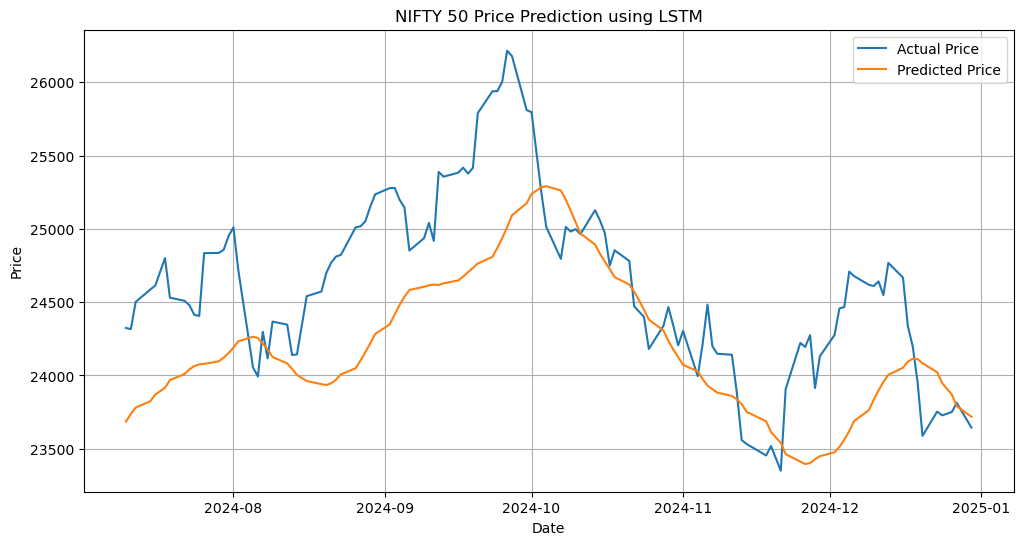

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Download NIFTY 50 index data
ticker = "^NSEI"  # NIFTY 50
df = yf.download(ticker, start="2020-01-01", end="2024-12-31")
df = df[['Close']]
df.dropna(inplace=True)

# Step 2: Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df)

# Step 3: Create sequences for LSTM
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(time_step, len(data)):
        X.append(data[i - time_step:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(scaled_data, time_step)

# Reshape into 3D [samples, time_steps, features]
X = X.reshape((X.shape[0], X.shape[1], 1))

# Step 4: Train-Test Split
train_size = int(len(X) * 0.9)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Step 5: Build LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=20, batch_size=32)

# Step 6: Predict
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted.reshape(-1, 1))

# Step 7: Actual prices for comparison
real_prices = df[-len(predicted_prices):].copy()
real_prices['Predicted'] = predicted_prices

# Step 8: Plotting
plt.figure(figsize=(12, 6))
plt.plot(real_prices['Close'], label="Actual Price")
plt.plot(real_prices['Predicted'], label="Predicted Price")
plt.title("NIFTY 50 Price Prediction using LSTM")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()
